### Exercises Part III
- Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.


- What are your drivers of churn?
- Does it make sense to combine any features?
- Do you find any surprises?
- Document any and all findings and takeaways in your notebook using markdown.

In [1]:
# Env set up
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split
import acquire as acq
import prepare as pp

In [15]:
# Acquire data
telco = acq.get_telco_data()

Using cached csv


In [16]:
telco = pp.prep_telco(telco)

Using cached csv


In [17]:
train.shape, validate.shape, test.shape 

((3943, 24), (1691, 24), (1409, 24))

In [18]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
6832,1,2,2,9705-IOVQQ,Male,1,Yes,Yes,61,Yes,Yes,No,Yes,No,No,Yes,Yes,No,99.00,5969.3,No,One year,Fiber optic,Electronic check
433,4,1,2,0635-WKOLD,Male,0,Yes,No,40,Yes,Yes,No,Yes,No,Yes,Yes,No,No,70.75,2921.75,No,One year,DSL,Credit card (automatic)
25,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,No,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)
3196,1,1,1,4581-LNWUM,Female,0,No,No,13,No,No phone service,No,No,Yes,No,Yes,Yes,No,49.15,649.4,No,Month-to-month,DSL,Electronic check
4466,1,2,3,6297-NOOPG,Female,0,Yes,No,70,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,110.50,7752.05,No,Two year,Fiber optic,Electronic check


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 6832 to 2320
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   customer_id               3943 non-null   object 
 4   gender                    3943 non-null   object 
 5   senior_citizen            3943 non-null   int64  
 6   partner                   3943 non-null   object 
 7   dependents                3943 non-null   object 
 8   tenure                    3943 non-null   int64  
 9   phone_service             3943 non-null   object 
 10  multiple_lines            3943 non-null   object 
 11  online_security           3943 non-null   object 
 12  online_backup             3943 non-null   object 
 13  device_protection         3943 non-null   object 
 14  tech_

In [20]:
train.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,2.321836,1.875476,1.698960,0.158002,32.223180,64.600900
std,1.145059,0.739523,0.837609,0.364789,24.531767,30.159764
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.575000
50%,2.000000,2.000000,1.000000,0.000000,28.000000,70.050000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.800000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


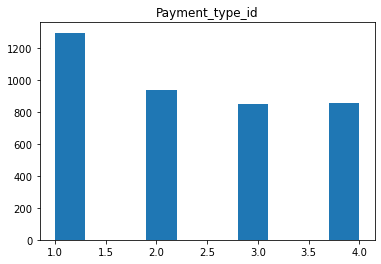

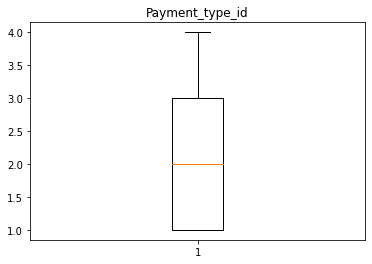

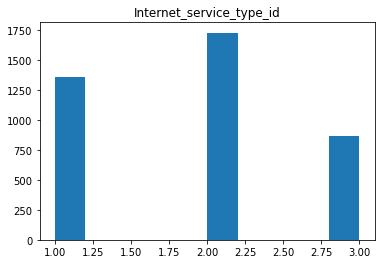

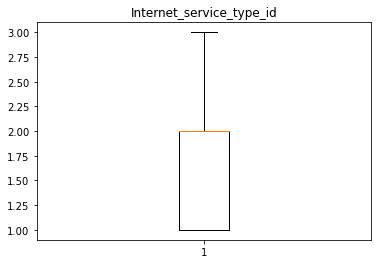

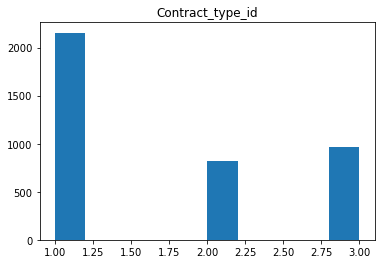

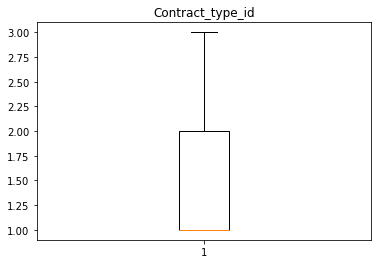

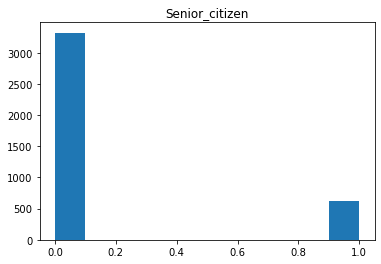

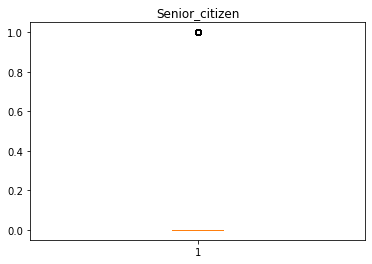

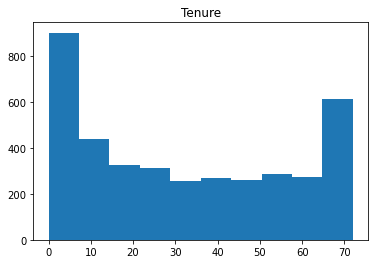

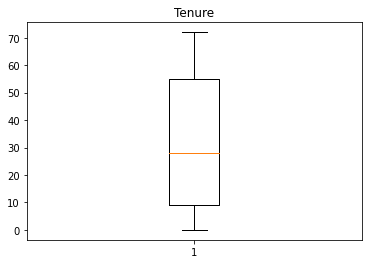

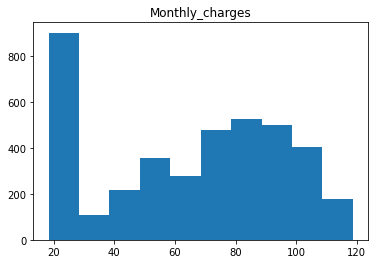

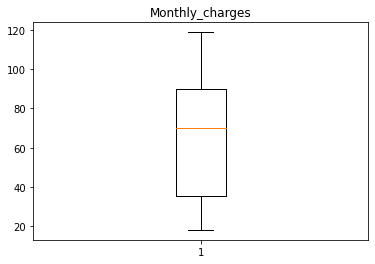

In [21]:
#For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()). 
#Plot numeric columns
# objects
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col.capitalize())
    plt.show()
    plt.boxplot(train[col])
    plt.title(col.capitalize())
    plt.show()

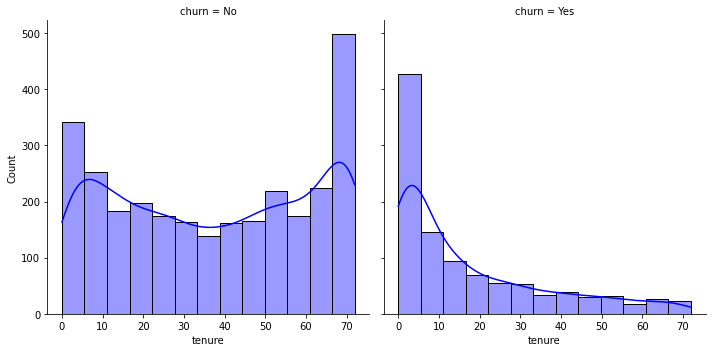

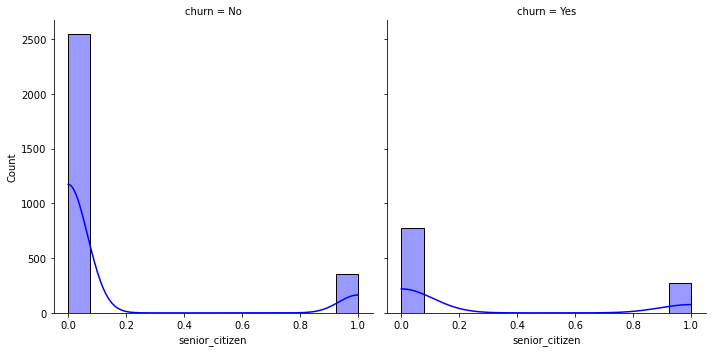

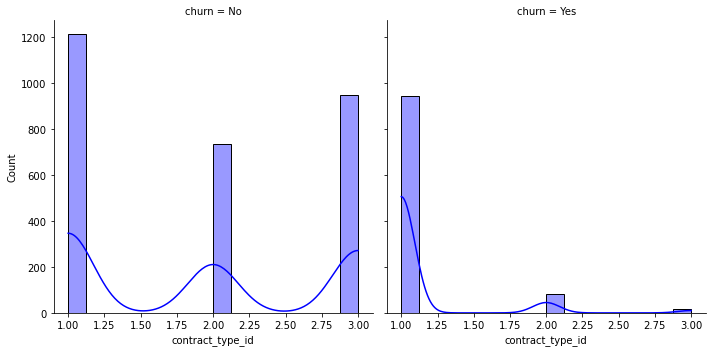

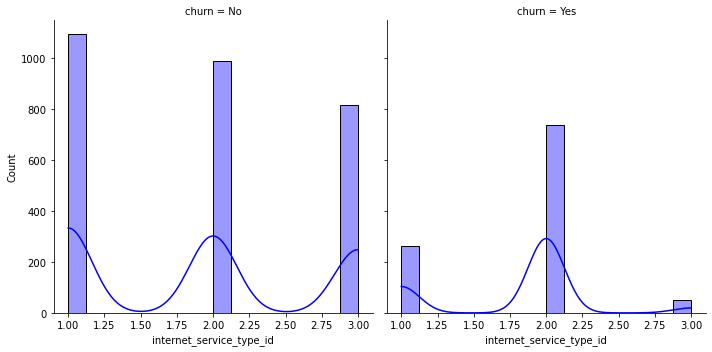

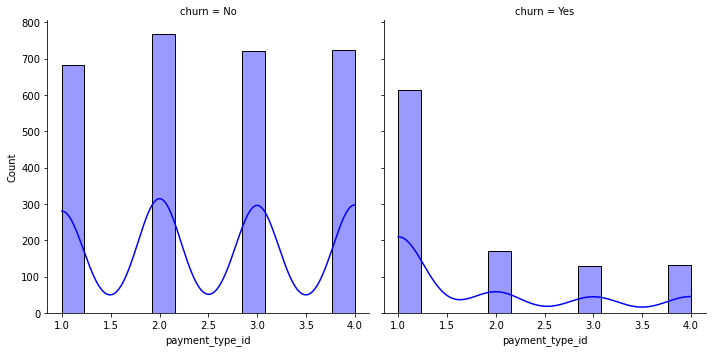

In [22]:
sns.displot(data = train, x = 'tenure', col = 'churn', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'senior_citizen', col = 'churn', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'contract_type_id', col = 'churn', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'internet_service_type_id', col = 'churn', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'payment_type_id', col = 'churn', kde = True, color = 'blue', alpha = 0.4)
plt.show()

<AxesSubplot:xlabel='churn', ylabel='payment_type_id'>

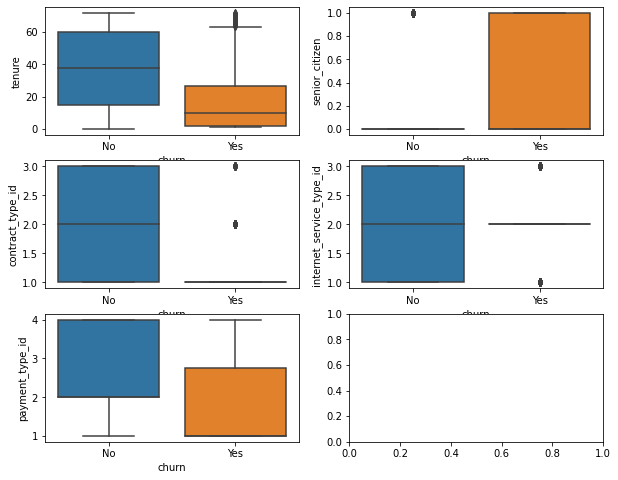

In [23]:
fig, ax = plt.subplots(3,2, figsize = (10,8))
sns.boxplot(y = 'tenure', x = 'churn', data = train, ax=ax[0,0])
sns.boxplot(y = 'senior_citizen', x = 'churn', data = train, ax=ax[0,1])
sns.boxplot(y = 'contract_type_id', x = 'churn', data = train, ax=ax[1,0])
sns.boxplot(y = 'internet_service_type_id', x = 'churn', data = train, ax=ax[1,1])
sns.boxplot(y = 'payment_type_id', x = 'churn', data = train, ax=ax[2,0])

### takeaways

### Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

Document takeaways & any actions.

In [26]:
train.payment_type_id.value_counts(), train.contract_type_id.value_counts()

(1    1297
 2     937
 4     857
 3     852
 Name: payment_type_id, dtype: int64,
 1    2155
 3     968
 2     820
 Name: contract_type_id, dtype: int64)